# Understanding results for overall model

## Prepare results table

In [45]:
import pipeline as pp
import pandas as pd
import config

In [46]:
# Overall Model
r2015 = pd.read_csv("results/results_2015.csv")
r2016 = pd.read_csv("results/results_2016.csv")
r2017 = pd.read_csv("results/results_2017.csv")

results = pd.DataFrame(columns=r2015.columns)
r = [r2015, r2016, r2017]
for df in r:
    results = results.append(df)

results_overall = results[results['gender']=='TOTAL']
results_male = results[results['gender']=='MALE']
results_female = results[results['gender']=='FEMALE']

results2015 = results_overall[results_overall['year']==2015]
results2016 = results_overall[results_overall['year']==2016]
results2017 = results_overall[results_overall['year']==2017]



print(len(results2015))
print(len(results2016))
print(len(results2017))  


104
104
104


In [47]:
# Male Model
male2015 = pd.read_csv("results/MALE_results_2015.csv")
male2016 = pd.read_csv("results/MALE_results_2016.csv")
male2017 = pd.read_csv("results/MALE_results_2017.csv")

males = pd.DataFrame(columns=results2015.columns)
r = [male2015, male2016, male2017]
for df in r:
    males = males.append(df)

print(len(male2015))
print(len(male2016))
print(len(male2017))  

104
104
104


In [48]:
# Female Model
female2015 = pd.read_csv("results/FEMALE_results_2015.csv")
female2016 = pd.read_csv("results/FEMALE_results_2016.csv")
female2017 = pd.read_csv("results/FEMALE_results_2017.csv")

females = pd.DataFrame(columns=results2015.columns)
r = [female2015, female2016, female2017]
for df in r:
    females = females.append(df)

print(len(female2015))
print(len(female2016))
print(len(female2017))  

104
104
104


In [49]:
results.columns

Index(['year', 'gender', 'model', 'classifiers', 'parameters',
       'train_set_size', 'num_features', 'validation_set_size', 'baseline',
       'auc', 'accuracy_1', 'precision_1', 'recall_1', 'f1_1', 'accuracy_2',
       'precision_2', 'recall_2', 'f1_2', 'accuracy_5', 'precision_5',
       'recall_5', 'f1_5', 'accuracy_10', 'precision_10', 'recall_10', 'f1_10',
       'accuracy_20', 'precision_20', 'recall_20', 'f1_20', 'accuracy_30',
       'precision_30', 'recall_30', 'f1_30', 'accuracy_50', 'precision_50',
       'recall_50', 'f1_50'],
      dtype='object')

## Get best model by train-test sets

In [50]:
time_col = config.TRAIN_TEST_COL
test_years = list(range(2015,2018))
cols = ['year', 'baseline', 'accuracy_10', 'recall_10', 'precision_10', 'f1_10', 'auc', 'classifiers','parameters']
metric = 'recall_10'


# Get highest recall by each of the train-test sets
print('overall model')
best_models = pp.get_best_models(results_overall, time_col, test_years, cols, metric)
print()
print('FOR MALES')
print('male model')
best_male = pp.get_best_models(males, time_col, test_years, cols, metric)
print()

print('FOR FEMALES')
print('female model')
best_female = pp.get_best_models(females, time_col, test_years, cols, metric)
print()

overall model
For train-test set 2015, highest recall_10 attained is 0.5938461538461538
For train-test set 2016, highest recall_10 attained is 0.6008374040474529
For train-test set 2017, highest recall_10 attained is 0.6953727506426736

FOR MALES
male model
For train-test set 2015, highest recall_10 attained is 0.5876736111111112
For train-test set 2016, highest recall_10 attained is 0.5892857142857143
For train-test set 2017, highest recall_10 attained is 0.689859363434493

FOR FEMALES
female model
For train-test set 2015, highest recall_10 attained is 0.6830985915492958
For train-test set 2016, highest recall_10 attained is 0.6802030456852792
For train-test set 2017, highest recall_10 attained is 0.7602040816326531



In [51]:
best_models

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
12,2015,0.082750,0.915532,0.593846,0.491407,0.537792,0.907419,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1', 'random_state': 0}"
93,2016,0.091554,0.918477,0.600837,0.550160,0.574383,0.895256,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
78,2017,0.094994,0.937118,0.695373,0.660562,0.677520,0.959724,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."


In [52]:
# For males in overall-2015
results_male2015= results_male[results_male['year']==2015]
results_male2015[results_male2015['parameters']=="{'C': 1, 'penalty': 'l1', 'random_state': 0}"][cols]

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
13,2015,0.08275,0.915026,0.58941,0.495259,0.538248,0.906198,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1', 'random_state': 0}"


In [53]:
# For females in overall-2015
results_female2015= results_female[results_female['year']==2015]
results_female2015[results_female2015['parameters']=="{'C': 1, 'penalty': 'l1', 'random_state': 0}"][cols]

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
14,2015,0.08275,0.925026,0.669014,0.492228,0.567164,0.91822,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1', 'random_state': 0}"


In [54]:
# For males in overall-2016
results_male2015= results_male[results_male['year']==2016]
results_male2015[results_male2015['parameters']=="{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 50, 'random_state': 0}"][cols]

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
94,2016,0.091554,0.916224,0.589141,0.536531,0.561607,0.89272,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."


In [55]:
# For females in overall-2016
results_female2015= results_female[results_female['year']==2016]
results_female2015[results_female2015['parameters']=="{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 50, 'random_state': 0}"][cols]

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
95,2016,0.091554,0.933333,0.675127,0.645631,0.66005,0.908506,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."


In [30]:
# For males in overall-2017
results_male2015= results_male[results_male['year']==2017]
results_male2015[results_male2015['parameters']=="{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}"][cols]

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
79,2017,0.094994,0.934581,0.679204,0.655516,0.66715,0.957188,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."


In [56]:
# For females in overall-2017
results_female2015= results_female[results_female['year']==2017]
results_female2015[results_female2015['parameters']=="{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}"][cols]

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
80,2017,0.094994,0.950486,0.790816,0.685841,0.734597,0.975952,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."


In [57]:
best_male

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
4,2015,0.084059,0.914734,0.587674,0.493800,0.536663,0.906452,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1', 'random_state': 0}"
28,2016,0.091003,0.916297,0.589286,0.537380,0.562137,0.939198,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
27,2017,0.096318,0.936634,0.689859,0.665714,0.677572,0.964026,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."


In [58]:
best_female

,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
94,2015,0.074000,0.927094,0.683099,0.502591,0.579104,0.940192,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
14,2016,0.094717,0.934730,0.680203,0.653659,0.666667,0.937961,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
88,2017,0.085874,0.945108,0.760204,0.659292,0.706161,0.966420,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."


#### Top-k best models

In [59]:
# Overall Models
metric = 'recall_10'
top_k = 10
cols = ['gender'] + cols

topk2015 = pp.sort_models(results2015, metric, top_k, cols)
topk2016 = pp.sort_models(results2016, metric, top_k, cols)
topk2017 = pp.sort_models(results2017, metric, top_k, cols)

# Male Models
maletopk2015 = pp.sort_models(male2015, metric, top_k, cols)
maletopk2016 = pp.sort_models(male2016, metric, top_k, cols)
maletopk2017 = pp.sort_models(male2017, metric, top_k, cols)

# Female Models
femaletopk2015 = pp.sort_models(female2015, metric, top_k, cols)
femaletopk2016 = pp.sort_models(female2016, metric, top_k, cols)
femaletopk2017 = pp.sort_models(female2017, metric, top_k, cols)

In [60]:
topk2015

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
12,TOTAL,2015,0.08275,0.915532,0.593846,0.491407,0.537792,0.907419,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1', 'random_state': 0}"
84,TOTAL,2015,0.08275,0.915022,0.590769,0.488861,0.535005,0.929470,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
81,TOTAL,2015,0.08275,0.914640,0.588462,0.486951,0.532915,0.922568,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
78,TOTAL,2015,0.08275,0.914131,0.585385,0.484405,0.530129,0.918570,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
18,TOTAL,2015,0.08275,0.914004,0.584615,0.483768,0.529432,0.902477,"LogisticRegression(C=10, class_weight=None, du...","{'C': 10, 'penalty': 'l1', 'random_state': 0}"
21,TOTAL,2015,0.08275,0.913622,0.582308,0.481859,0.527342,0.902390,"LogisticRegression(C=10, class_weight=None, du...","{'C': 10, 'penalty': 'l2', 'random_state': 0}"
261,TOTAL,2015,0.08275,0.913240,0.580000,0.479949,0.525253,0.915654,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
273,TOTAL,2015,0.08275,0.913240,0.580000,0.479949,0.525253,0.920497,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
264,TOTAL,2015,0.08275,0.912985,0.578462,0.478676,0.523859,0.920726,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
279,TOTAL,2015,0.08275,0.912731,0.576923,0.477403,0.522466,0.917547,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."


In [61]:
topk2016

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
93,TOTAL,2016,0.091554,0.918477,0.600837,0.550160,0.574383,0.895256,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
81,TOTAL,2016,0.091554,0.918094,0.598744,0.548243,0.572382,0.941764,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
48,TOTAL,2016,0.091554,0.917710,0.596650,0.546326,0.570380,0.947011,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
78,TOTAL,2016,0.091554,0.917199,0.593859,0.543770,0.567712,0.939616,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
90,TOTAL,2016,0.091554,0.916432,0.589672,0.539936,0.563709,0.837530,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
84,TOTAL,2016,0.091554,0.916432,0.589672,0.539936,0.563709,0.945692,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
45,TOTAL,2016,0.091554,0.916177,0.588276,0.538658,0.562375,0.937683,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
264,TOTAL,2016,0.091554,0.915794,0.586183,0.536741,0.560374,0.932205,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
42,TOTAL,2016,0.091554,0.915027,0.581996,0.532907,0.556371,0.935268,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
273,TOTAL,2016,0.091554,0.914899,0.581298,0.532268,0.555704,0.931326,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."


In [62]:
topk2017

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
78,TOTAL,2017,0.094994,0.937118,0.695373,0.660562,0.677520,0.959724,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
81,TOTAL,2017,0.094994,0.936874,0.694087,0.659341,0.676268,0.959789,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
84,TOTAL,2017,0.094994,0.936752,0.693445,0.658730,0.675642,0.966303,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
93,TOTAL,2017,0.094994,0.936386,0.691517,0.656899,0.673763,0.923801,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
90,TOTAL,2017,0.094994,0.935531,0.687018,0.652625,0.669380,0.859714,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
57,TOTAL,2017,0.094994,0.934554,0.681877,0.647741,0.664371,0.943614,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
45,TOTAL,2017,0.094994,0.934188,0.679949,0.645910,0.662492,0.956576,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
42,TOTAL,2017,0.094994,0.933822,0.678021,0.644078,0.660614,0.956058,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
87,TOTAL,2017,0.094994,0.933211,0.674807,0.641026,0.657483,0.844198,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
48,TOTAL,2017,0.094994,0.932845,0.672879,0.639194,0.655604,0.965850,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."


In [20]:
maletopk2015

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
4,MALE,2015,0.084059,0.914734,0.587674,0.493800,0.536663,0.906452,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1', 'random_state': 0}"
6,MALE,2015,0.084059,0.913567,0.580729,0.487965,0.530321,0.901703,"LogisticRegression(C=10, class_weight=None, du...","{'C': 10, 'penalty': 'l1', 'random_state': 0}"
5,MALE,2015,0.084059,0.912400,0.573785,0.482130,0.523979,0.902886,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2', 'random_state': 0}"
7,MALE,2015,0.084059,0.912400,0.573785,0.482130,0.523979,0.901961,"LogisticRegression(C=10, class_weight=None, du...","{'C': 10, 'penalty': 'l2', 'random_state': 0}"
90,MALE,2015,0.084059,0.911670,0.569444,0.478483,0.520016,0.913254,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
88,MALE,2015,0.084059,0.910941,0.565104,0.474836,0.516052,0.916850,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
3,MALE,2015,0.084059,0.910649,0.563368,0.473377,0.514467,0.898708,"LogisticRegression(C=0.1, class_weight=None, d...","{'C': 0.1, 'penalty': 'l2', 'random_state': 0}"
87,MALE,2015,0.084059,0.910649,0.563368,0.473377,0.514467,0.911956,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
91,MALE,2015,0.084059,0.910503,0.562500,0.472648,0.513674,0.915301,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
28,MALE,2015,0.084059,0.910357,0.561632,0.471918,0.512881,0.928642,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."


In [21]:
maletopk2016

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
28,MALE,2016,0.091003,0.916297,0.589286,0.537380,0.562137,0.939198,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
16,MALE,2016,0.091003,0.915409,0.584416,0.532939,0.557491,0.944788,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
27,MALE,2016,0.091003,0.915112,0.582792,0.531458,0.555943,0.934982,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
15,MALE,2016,0.091003,0.914964,0.581981,0.530718,0.555168,0.940327,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
31,MALE,2016,0.091003,0.914964,0.581981,0.530718,0.555168,0.889727,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
26,MALE,2016,0.091003,0.914668,0.580357,0.529238,0.553620,0.926654,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
14,MALE,2016,0.091003,0.914372,0.578734,0.527757,0.552071,0.932885,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
87,MALE,2016,0.091003,0.914076,0.577110,0.526277,0.550523,0.927288,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
4,MALE,2016,0.091003,0.913928,0.576299,0.525537,0.549748,0.908455,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1', 'random_state': 0}"
88,MALE,2016,0.091003,0.913632,0.574675,0.524056,0.548200,0.929946,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."


In [22]:
maletopk2017

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
27,MALE,2017,0.096318,0.936634,0.689859,0.665714,0.677572,0.964026,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
26,MALE,2017,0.096318,0.936205,0.687639,0.663571,0.675391,0.964507,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
31,MALE,2017,0.096318,0.935777,0.685418,0.661429,0.673210,0.924520,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
28,MALE,2017,0.096318,0.935491,0.683938,0.660000,0.671756,0.967152,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
19,MALE,2017,0.096318,0.932062,0.666173,0.642857,0.654308,0.932555,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
16,MALE,2017,0.096318,0.931776,0.664693,0.641429,0.652854,0.965767,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
15,MALE,2017,0.096318,0.931633,0.663953,0.640714,0.652126,0.957830,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
14,MALE,2017,0.096318,0.931490,0.663212,0.640000,0.651399,0.957897,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
30,MALE,2017,0.096318,0.931204,0.661732,0.638571,0.649945,0.850182,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
29,MALE,2017,0.096318,0.928490,0.647668,0.625000,0.636132,0.826959,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."


In [23]:
femaletopk2015

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
94,FEMALE,2015,0.074,0.927094,0.683099,0.502591,0.579104,0.940192,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
27,FEMALE,2015,0.074,0.926060,0.676056,0.497409,0.573134,0.930754,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
70,FEMALE,2015,0.074,0.926060,0.676056,0.497409,0.573134,0.928383,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min..."
93,FEMALE,2015,0.074,0.926060,0.676056,0.497409,0.573134,0.936687,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
16,FEMALE,2015,0.074,0.926060,0.676056,0.497409,0.573134,0.940498,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
91,FEMALE,2015,0.074,0.926060,0.676056,0.497409,0.573134,0.941367,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
88,FEMALE,2015,0.074,0.926060,0.676056,0.497409,0.573134,0.941186,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
76,FEMALE,2015,0.074,0.926060,0.676056,0.497409,0.573134,0.928367,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min..."
28,FEMALE,2015,0.074,0.925026,0.669014,0.492228,0.567164,0.930114,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
15,FEMALE,2015,0.074,0.925026,0.669014,0.492228,0.567164,0.929155,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."


In [24]:
femaletopk2016

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
14,FEMALE,2016,0.094717,0.934730,0.680203,0.653659,0.666667,0.937961,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
16,FEMALE,2016,0.094717,0.933755,0.675127,0.648780,0.661692,0.951838,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
93,FEMALE,2016,0.094717,0.933755,0.675127,0.648780,0.661692,0.941668,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
87,FEMALE,2016,0.094717,0.933755,0.675127,0.648780,0.661692,0.945114,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
28,FEMALE,2016,0.094717,0.932781,0.670051,0.643902,0.656716,0.945691,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
15,FEMALE,2016,0.094717,0.932781,0.670051,0.643902,0.656716,0.931322,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
72,FEMALE,2016,0.094717,0.931807,0.664975,0.639024,0.651741,0.934245,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min..."
76,FEMALE,2016,0.094717,0.931807,0.664975,0.639024,0.651741,0.933001,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 10, 'max_features': 'sqrt', 'min..."
27,FEMALE,2016,0.094717,0.931807,0.664975,0.639024,0.651741,0.923672,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
26,FEMALE,2016,0.094717,0.931807,0.664975,0.639024,0.651741,0.923446,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."


In [25]:
femaletopk2017

,gender,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,classifiers,parameters
88,FEMALE,2017,0.085874,0.945108,0.760204,0.659292,0.706161,0.966420,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
93,FEMALE,2017,0.085874,0.944223,0.755102,0.654867,0.701422,0.961513,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
91,FEMALE,2017,0.085874,0.944223,0.755102,0.654867,0.701422,0.965176,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
16,FEMALE,2017,0.085874,0.943338,0.750000,0.650442,0.696682,0.948773,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
87,FEMALE,2017,0.085874,0.942452,0.744898,0.646018,0.691943,0.961686,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
94,FEMALE,2017,0.085874,0.942452,0.744898,0.646018,0.691943,0.964113,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
90,FEMALE,2017,0.085874,0.942452,0.744898,0.646018,0.691943,0.962332,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
28,FEMALE,2017,0.085874,0.942452,0.744898,0.646018,0.691943,0.949822,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
15,FEMALE,2017,0.085874,0.941567,0.739796,0.641593,0.687204,0.941017,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
25,FEMALE,2017,0.085874,0.940682,0.734694,0.637168,0.682464,0.959090,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 5, 'min_..."


## Get Stability Score

In [26]:
# Overall Model
pp.get_stability_score([results2015,results2016,results2017], metric, cols)

,,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,rank
classifiers,parameters,,,,,,,
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",0.089766,0.923203,0.627098,0.564845,0.593855,0.941374,1.333333
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}",0.089766,0.922816,0.624872,0.562912,0.591787,0.939304,2.000000
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.089766,0.922736,0.624629,0.562509,0.591452,0.947155,2.666667
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.089766,0.921053,0.615228,0.554095,0.582585,0.947044,7.333333
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 50, 'random_state': 0}",0.089766,0.921555,0.617195,0.556607,0.584863,0.901393,9.333333
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",0.089766,0.920523,0.611972,0.551444,0.579658,0.939270,9.333333
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.089766,0.918628,0.602439,0.541973,0.570136,0.933698,9.666667
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}",0.089766,0.920060,0.609493,0.549129,0.577263,0.937832,10.000000
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_sample

In [27]:
results_male[results_male['parameters']=="{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}"].groupby('parameters').mean()['recall_10']

parameters
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}    0.611568
Name: recall_10, dtype: float64

In [28]:
results_female[results_female['parameters']=="{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}"].groupby('parameters').mean()['recall_10']

parameters
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}    0.727819
Name: recall_10, dtype: float64

In [29]:
# Male Models
pp.get_stability_score([male2015,male2016,male2017], metric, cols)

,,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,rank
classifiers,parameters,,,,,,,,
"LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='warn',\n n_jobs=None, penalty='l1', random_state=0, solver='warn',\n tol=0.0001, verbose=0, warm_start=False)","{'C': 1, 'penalty': 'l1', 'random_state': 0}",2015.0,0.084059,0.914734,0.587674,0.493800,0.536663,0.906452,0.000000
"LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='warn',\n n_jobs=None, penalty='l1', random_state=0, solver='warn',\n tol=0.0001, verbose=0, warm_start=False)","{'C': 10, 'penalty': 'l1', 'random_state': 0}",2015.0,0.084059,0.913567,0.580729,0.487965,0.530321,0.901703,1.000000
"LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='warn',\n n_jobs=None, penalty='l2', random_state=0, solver='warn',\n tol=0.0001, verbose=0, warm_start=False)","{'C': 1, 'penalty': 'l2', 'random_state': 0}",2015.0,0.084059,0.912400,0.573785,0.482130,0.523979,0.902886,2.000000
"LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='warn',\n n_jobs=None, penalty='l2', random_state=0, solver='warn',\n tol=0.0001, verbose=0, warm_start=False)","{'C': 10, 'penalty': 'l2', 'random_state': 0}",2015.0,0.084059,0.912400,0.573785,0.482130,0.523979,0.901961,3.000000
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",2016.0,0.090460,0.920715,0.611618,0.556433,0.582258,0.944997,4.000000
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",2016.0,0.090460,0.920701,0.611428,0.556364,0.582132,0.940534,4.333333
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",2016.0,0.090460,0.919181,0.603580,0.548762,0.574409,0.945278,6.000000
"LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='warn',\n n_jobs=None, penalty='l2', random_state=0, solver='warn',\n tol=0.0001, verbose=0, warm_start=False)","{'C': 0.1, 'penalty': 'l2', 'random_state': 0}",2015.0,0.084059,0.910649,0.563368,0.473377,0.514467,0.898708,6.000000
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",2016.0,0.090460,0.918985,0.602522,0.547784,0.573392,0.938210,6.333333


In [30]:
# Female Models
pp.get_stability_score([female2015,female2016,female2017], metric, cols)

,,year,baseline,accuracy_10,recall_10,precision_10,f1_10,auc,rank
classifiers,parameters,,,,,,,,
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}",2016.0,0.084864,0.934680,0.702095,0.600352,0.645416,0.946623,2.000000
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",2016.0,0.084864,0.934384,0.700394,0.598877,0.643836,0.947037,2.666667
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",2016.0,0.084864,0.933420,0.694654,0.594049,0.638608,0.941876,6.333333
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",2016.0,0.084864,0.933125,0.692954,0.592574,0.637028,0.933831,7.333333
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=10, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",2016.0,0.084864,0.932850,0.691908,0.591201,0.635780,0.937071,7.666667
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",2016.0,0.084864,0.931964,0.686806,0.586776,0.631041,0.925721,9.666667
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",2016.0,0.084864,0.933676,0.697028,0.595323,0.640362,0.951911,9.666667
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=10, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split':

## Plot Metric Graph over traintest sets

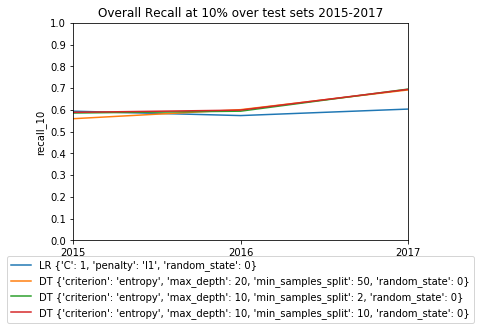

In [63]:
# To be edited to the graphs we want 

metric='recall_10'
model_and_para = [('LR', "{'C': 1, 'penalty': 'l1', 'random_state': 0}"),
                  ('DT', "{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 50, 'random_state': 0}"),
                  ('DT', "{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}"),
                  ('DT', "{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}")
                 ]
# ADD MORE PLOTS HERE

baseline= None #[0.091554, 0.094994, 0.047992]
title='Overall Recall at 10% over test sets 2015-2017'
filename='overall_recall_test2015-2017'
pp.get_metric_graph(results_overall, metric, model_and_para, baseline, time_col, [2015,2016,2017], title, filename, save=False)

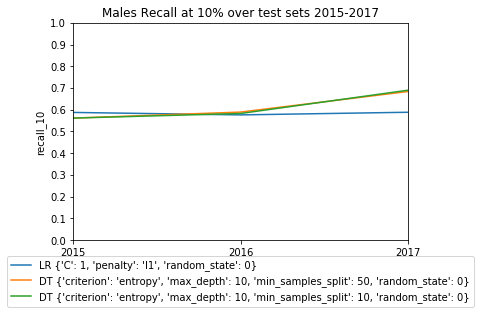

In [64]:
model_and_para = [('LR', "{'C': 1, 'penalty': 'l1', 'random_state': 0}"),
                  ('DT', "{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}"),
                  ('DT', "{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}")
                 ]
title='Males Recall at 10% over test sets 2015-2017'
filename='MALE_recall_test2015-2017'

pp.get_metric_graph(males, metric, model_and_para, baseline, time_col, test_years, title, filename, save=False)

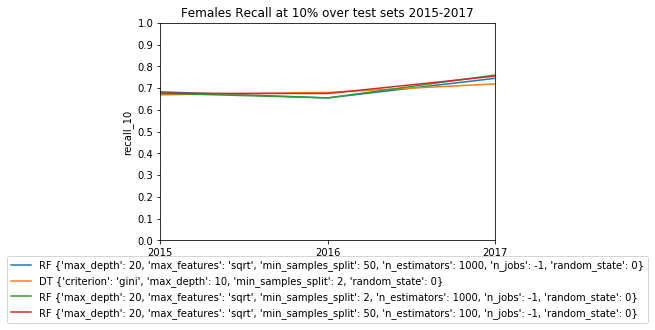

In [65]:
model_and_para = [('RF', "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}"),
                  ('DT', "{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}"),
                  ('RF', "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}"),
                  ('RF', "{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}")
                 ]
title='Females Recall at 10% over test sets 2015-2017'
filename='FEMALE_recall_test2015-2017'
pp.get_metric_graph(females, metric, model_and_para, baseline, time_col, test_years, title, filename, save=False)

In [7]:
fi_best = pd.read_csv("results/FIMPORTANCE_2017_DT_{'criterion'- 'entropy', 'max_depth'- 10, 'min_samples_split'- 10, 'random_state'- 0}.csv")

In [13]:
fi = fi_best[:10][['Features','Importance']]

In [14]:
fi.to_csv('feature_imp_best.csv')

In [15]:
fi

,Features,Importance
0,NUM_PREV_INCARCERATION_LAST5YR,0.718511
1,TOTAL_INCARCERATION_ALLPRIOR,0.083330
2,INCARCERATION_LEN_DAYS,0.037794
3,AVG_SENT_LAST5YR,0.029028
4,TOTAL_SENT_LAST5YR,0.025423
5,NUM_PREV_INCARCERATION_ALLPRIOR,0.023376
6,SENTENCING_PENALTY_CLASS_CODE_CRV,0.018756
7,AGE_AT_END_DATE,0.010880
8,PRIMARY_OFFENSE_CODE_POST RELEASE REVOCATION,0.007208
9,AVG_INCARCERATION_LAST5YR,0.005394
